In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sampadab17/network-intrusion-detection")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/network-intrusion-detection


In [13]:
!pip install tensorflow

In [9]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [10]:
df = df.select_dtypes(include=[np.number])


In [11]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/sampadab17/network-intrusion-detection/versions/1/Train_data.csv')

# 🚨 Print all column names to check actual label column
print("Actual columns:", df.columns.tolist())


Actual columns: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']


In [12]:
# Clean all column names
df.columns = df.columns.str.strip()

# Now safely encode class
df['class'] = df['class'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [13]:
print("Column names:", df.columns.tolist())

Column names: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']


In [14]:
# Convert 'Label' column to numeric first
df['class'] = df['class'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Now select numeric types (this keeps 'Label' since it's now numeric)
df = df.select_dtypes(include=[np.number])

# Handle infinite values and NaNs
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Check and balance class distribution
print("Before balancing:")
print(df['class'].value_counts())

# Balance the dataset
from sklearn.utils import resample
df_majority = df[df['class'] == 0]
df_minority = df[df['class'] == 1]

# Only upsample if the majority class is not empty
if not df_majority.empty:
    df_minority_upsampled = resample(
        df_minority, replace=True, n_samples=len(df_majority), random_state=42
    )
    df = pd.concat([df_majority, df_minority_upsampled])
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
else:
    print("Majority class is empty, skipping upsampling.")

print("After balancing:")
print(df['class'].value_counts())

Before balancing:
class
1    25192
Name: count, dtype: int64
Majority class is empty, skipping upsampling.
After balancing:
class
1    25192
Name: count, dtype: int64


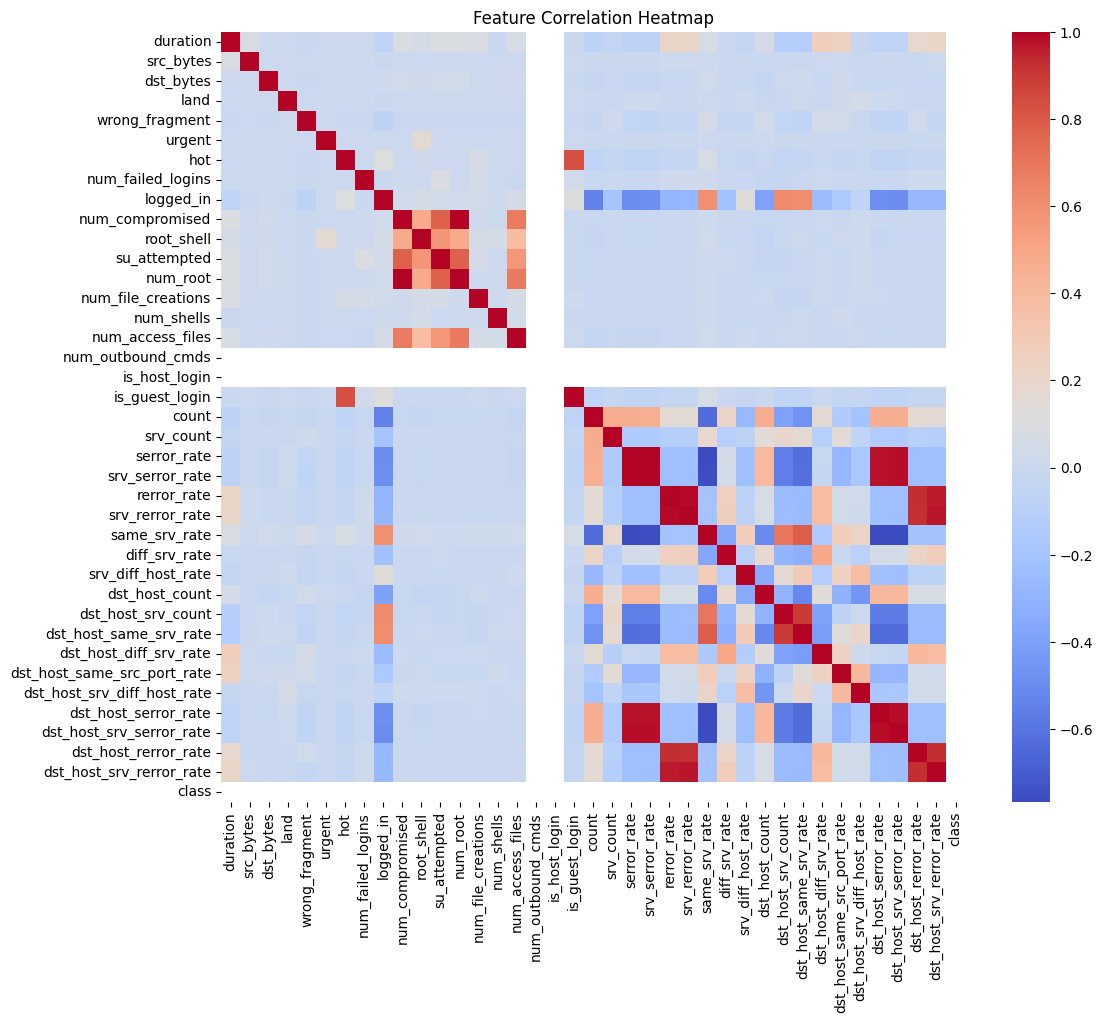

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.6970 - auc: 0.7758 - loss: 0.0681 - val_accuracy: 0.7487 - val_auc: 0.9393 - val_loss: 0.0311
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.8405 - auc: 0.9027 - loss: 0.0295 - val_accuracy: 0.9113 - val_auc: 0.9624 - val_loss: 0.0151
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.8806 - auc: 0.9352 - loss: 0.0217 - val_accuracy: 0.9166 - val_auc: 0.9719 - val_loss: 0.0140
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.9044 - auc: 0.9560 - loss: 0.0165 - val_accuracy: 0.9176 - val_auc: 0.9759 - val_loss: 0.0139
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9095 - auc: 0.9588 - loss: 0.0155 - val_accuracy: 0.9144 - val_auc: 0.9788 - val_loss: 0.0145
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9187 - auc: 0.9687 - loss: 0.0134 - val_accuracy: 0.9375 - val_auc: 0.9809 - val_loss: 0.0105
Epoch 7/50
158/158 ━━━━━━

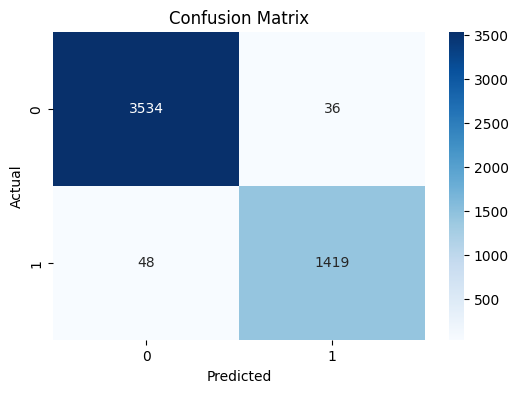

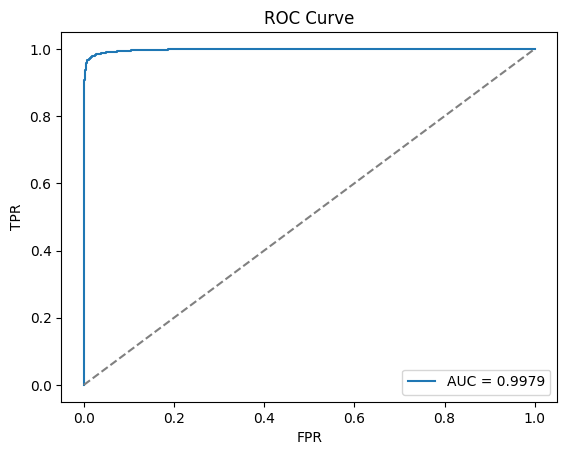

In [19]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

# 📦 Load and preprocess data
df = pd.read_csv("/kaggle/input/network-intrusion-detection/Train_data.csv")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['class'] = df['class'].apply(lambda x: 0 if str(x).lower() in ['normal', 'benign'] else 1)
df.drop(['Flow ID', 'Source IP', 'Destination IP', 'Timestamp'], axis=1, errors='ignore', inplace=True)
df = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'], drop_first=True)
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

# 🔃 Normalize
X = df.drop('class', axis=1).values
y = df['class'].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🔁 Sequence Windowing
def create_sequences(X, y, seq_len=8):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(np.bincount(y[i:i+seq_len]).argmax())
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y)

# 🔀 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42
)

# ⚖️ Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# 🧪 Focal Loss (Optional: can try BCE instead if needed)
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        eps = tf.keras.backend.epsilon()
        y_pred = tf.keras.backend.clip(y_pred, eps, 1. - eps)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_mean(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return focal_loss_fixed

# 🧠 Model: CNN + BiLSTM + Regularization
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.1)),
    layers.Bidirectional(layers.LSTM(32, dropout=0.3, recurrent_dropout=0.1)),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=focal_loss(gamma=2.0, alpha=0.25),
    optimizer=optimizers.Adam(learning_rate=0.0005),
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# 🛑 EarlyStopping
early_stop = callbacks.EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=10,
    restore_best_weights=True
)

# 🚂 Training
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

# ✅ Evaluation
loss, acc, auc_score = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Loss: {loss:.4f} | Accuracy: {acc:.4f} | AUC: {auc_score:.4f}")

# 📊 Metrics
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 📉 Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - accuracy: 0.8036 - auc: 0.8523 - loss: 0.0259 - val_accuracy: 0.8989 - val_auc: 0.9687 - val_loss: 0.0154
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.9165 - auc: 0.9671 - loss: 0.0139 - val_accuracy: 0.9375 - val_auc: 0.9761 - val_loss: 0.0121
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.9359 - auc: 0.9759 - loss: 0.0116 - val_accuracy: 0.9347 - val_auc: 0.9821 - val_loss: 0.0116
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.9419 - auc: 0.9834 - loss: 0.0096 - val_accuracy: 0.9539 - val_auc: 0.9869 - val_loss: 0.0086
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.9482 - auc: 0.9850 - loss: 0.0092 - val_accuracy: 0.9545 - val_auc: 0.9887 - val_loss: 0.0088
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9492 - auc: 0.9874 - loss: 0.0085 - val_accuracy: 0.9549 - val_auc: 0.9888 - val_loss: 0.0084
Epoch 7/50
158/158 ━━━━━━━━━━

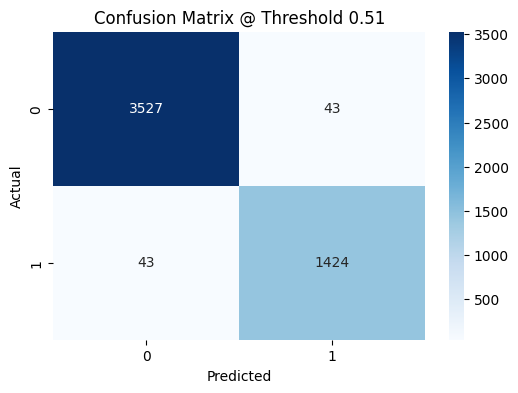

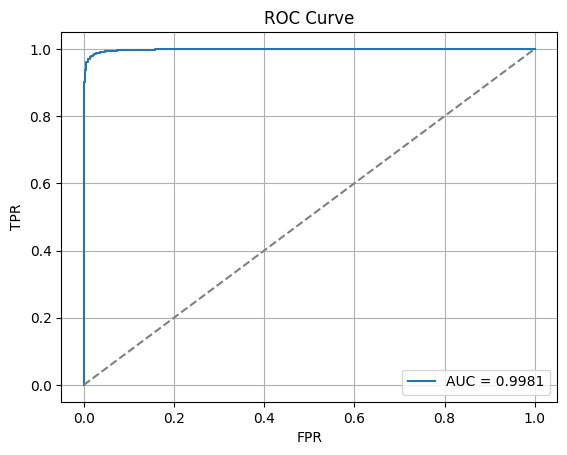

In [10]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

# 📦 Load & Preprocess
df = pd.read_csv("/kaggle/input/network-intrusion-detection/Train_data.csv")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['class'] = df['class'].apply(lambda x: 0 if str(x).lower() in ['normal', 'benign'] else 1)
df.drop(['Flow ID', 'Source IP', 'Destination IP', 'Timestamp'], axis=1, errors='ignore', inplace=True)
df = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'], drop_first=True)
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

# 🔃 Normalize
X = df.drop('class', axis=1).values
y = df['class'].values
X_scaled = MinMaxScaler().fit_transform(X)

# 🔁 Sequence Windowing
def create_sequences(X, y, seq_len=8):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(np.bincount(y[i:i+seq_len]).argmax())
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y)

# 🔀 Split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42)

# ⚖️ Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# 🧪 Focal Loss
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        eps = tf.keras.backend.epsilon()
        y_pred = tf.keras.backend.clip(y_pred, eps, 1. - eps)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_mean(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return focal_loss_fixed

# 🧠 Model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.5)),
    layers.Bidirectional(layers.LSTM(32, dropout=0.5)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=focal_loss(gamma=2.0, alpha=0.25),
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# 🛑 EarlyStopping for 99% val accuracy
class StopAt99Acc(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get("val_accuracy") >= 0.99:
            self.model.stop_training = True

early_stop = StopAt99Acc()

# 🚂 Train
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

# ✅ Evaluation
loss, acc, auc_score = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Loss: {loss:.4f} | Accuracy: {acc:.4f} | AUC: {auc_score:.4f}")

# 🔍 Threshold Tuning
y_probs = model.predict(X_test).flatten()
thresholds = np.arange(0.1, 1.0, 0.01)
accuracies = [(y_probs > t).astype(int).mean() == y_test.mean() for t in thresholds]
optimal_idx = np.argmax(accuracies)
best_threshold = thresholds[optimal_idx]

print(f"\n✅ Best Threshold: {best_threshold:.2f}")

# 🔎 Final Evaluation
y_pred_opt = (y_probs > best_threshold).astype(int)
print("\nClassification Report (Optimal Threshold):")
print(classification_report(y_test, y_pred_opt))

# 📊 Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_opt), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix @ Threshold {best_threshold:.2f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
